In [8]:
import pandas as pd


In [ ]:
df = pd.read_csv('internet_usage.csv')


In [ ]:
import os
os.getcwd()

In [12]:
import pandas as pd
import random
import numpy as np

random.seed(42)
np.random.seed(42)

n = 500

data = {
    "screen_time_hours": [],
    "video_hours": [],
    "social_hours": [],
    "online_classes_hours": [],
    "downloads": [],
    "device_type": [],
    "internet_type": [],
    "daily_data_usage_mb": []
}

for i in range(n):
    screen_time = round(random.uniform(1, 12), 1)
    video = round(random.uniform(0, 6), 1)
    social = round(random.uniform(0, 5), 1)
    classes = round(random.uniform(0, 4), 1)
    downloads = random.randint(0, 5)

    device = random.choice(["phone", "laptop"])
    internet = random.choice(["4G", "5G", "WiFi"])

    # Base usage logic (realistic)
    usage = (
        screen_time * 120 +
        video * 300 +
        social * 150 +
        classes * 200 +
        downloads * 250
    )

    # Device effect
    if device == "laptop":
        usage *= 1.2

    # Internet effect
    if internet == "WiFi":
        usage *= 1.3
    elif internet == "5G":
        usage *= 1.1

    # Add some noise
    usage += random.uniform(-100, 100)

    usage = max(300, round(usage))  # minimum realistic usage

    data["screen_time_hours"].append(screen_time)
    data["video_hours"].append(video)
    data["social_hours"].append(social)
    data["online_classes_hours"].append(classes)
    data["downloads"].append(downloads)
    data["device_type"].append(device)
    data["internet_type"].append(internet)
    data["daily_data_usage_mb"].append(usage)

df = pd.DataFrame(data)
df.to_csv("internet_usage.csv", index=False)

df.head()


,screen_time_hours,video_hours,social_hours,online_classes_hours,downloads,device_type,internet_type,daily_data_usage_mb
0,8.0,0.2,1.4,0.9,5,phone,WiFi,3506
1,7.0,3.5,0.2,0.4,1,phone,WiFi,2865
2,8.1,3.3,1.1,2.4,0,phone,WiFi,3374
3,4.1,1.3,3.8,0.4,3,phone,5G,2580
4,7.6,4.8,3.6,2.1,3,phone,WiFi,5239


In [ ]:
df .shape

Linear Regression Performance:
MAE: 117.0
MSE: 23721.75
R²: 0.982

Decision Tree Performance:
MAE: 556.66
MSE: 509428.78
R²: 0.604


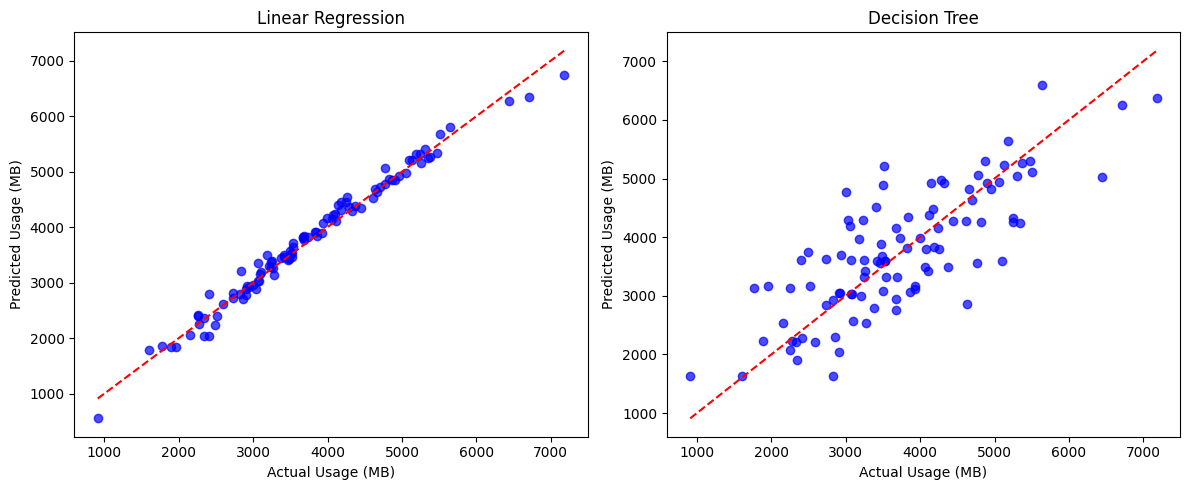


Model saved as linear_regression_model.pkl


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("internet_usage.csv")

# -----------------------------
# 2. Define features and target
# -----------------------------
X = df.drop("daily_data_usage_mb", axis=1)
y = df["daily_data_usage_mb"]

# -----------------------------
# 3. Categorical columns
# -----------------------------
categorical_cols = ["device_type", "internet_type"]

# -----------------------------
# 4. Preprocessor
# -----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ],
    remainder="passthrough"
)

# -----------------------------
# 5. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 6. Linear Regression Pipeline
# -----------------------------
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("MAE:", round(mae_lr, 2))
print("MSE:", round(mse_lr, 2))
print("R²:", round(r2_lr, 3))

# -----------------------------
# 7. Decision Tree Pipeline
# -----------------------------
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Performance:")
print("MAE:", round(mae_dt, 2))
print("MSE:", round(mse_dt, 2))
print("R²:", round(r2_dt, 3))

# -----------------------------
# 8. Visualization
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Usage (MB)")
plt.ylabel("Predicted Usage (MB)")
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Usage (MB)")
plt.ylabel("Predicted Usage (MB)")
plt.title("Decision Tree")

plt.tight_layout()
plt.show()

# -----------------------------
# 9. Save best model (choose one)
# -----------------------------
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(lr_pipeline, f)

print("\nModel saved as linear_regression_model.pkl")


In [7]:
import streamlit as st